In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
data = pd.read_csv("../data/raw_analyst_ratings.csv")

## Data headline

In [10]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [11]:
#Count headlines per day
daily_headlines = data.groupby('date').size()
# Create a DataFrame for time series analysis
time_series_data = pd.DataFrame({'date': daily_headlines.index, 'Headlines_Count': daily_headlines.values})
time_series_data.set_index('date', inplace=True)

In [12]:
print(time_series_data)

                           Headlines_Count
date                                      
2009-02-14 00:00:00                      1
2009-04-27 00:00:00                      2
2009-04-29 00:00:00                      1
2009-05-22 00:00:00                      1
2009-05-27 00:00:00                      6
...                                    ...
2020-06-11 16:49:41-04:00                1
2020-06-11 16:51:33-04:00                1
2020-06-11 17:01:39-04:00                1
2020-06-11 17:11:20-04:00                1
2020-06-11 17:12:35-04:00                1

[39957 rows x 1 columns]


In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive',period=30)

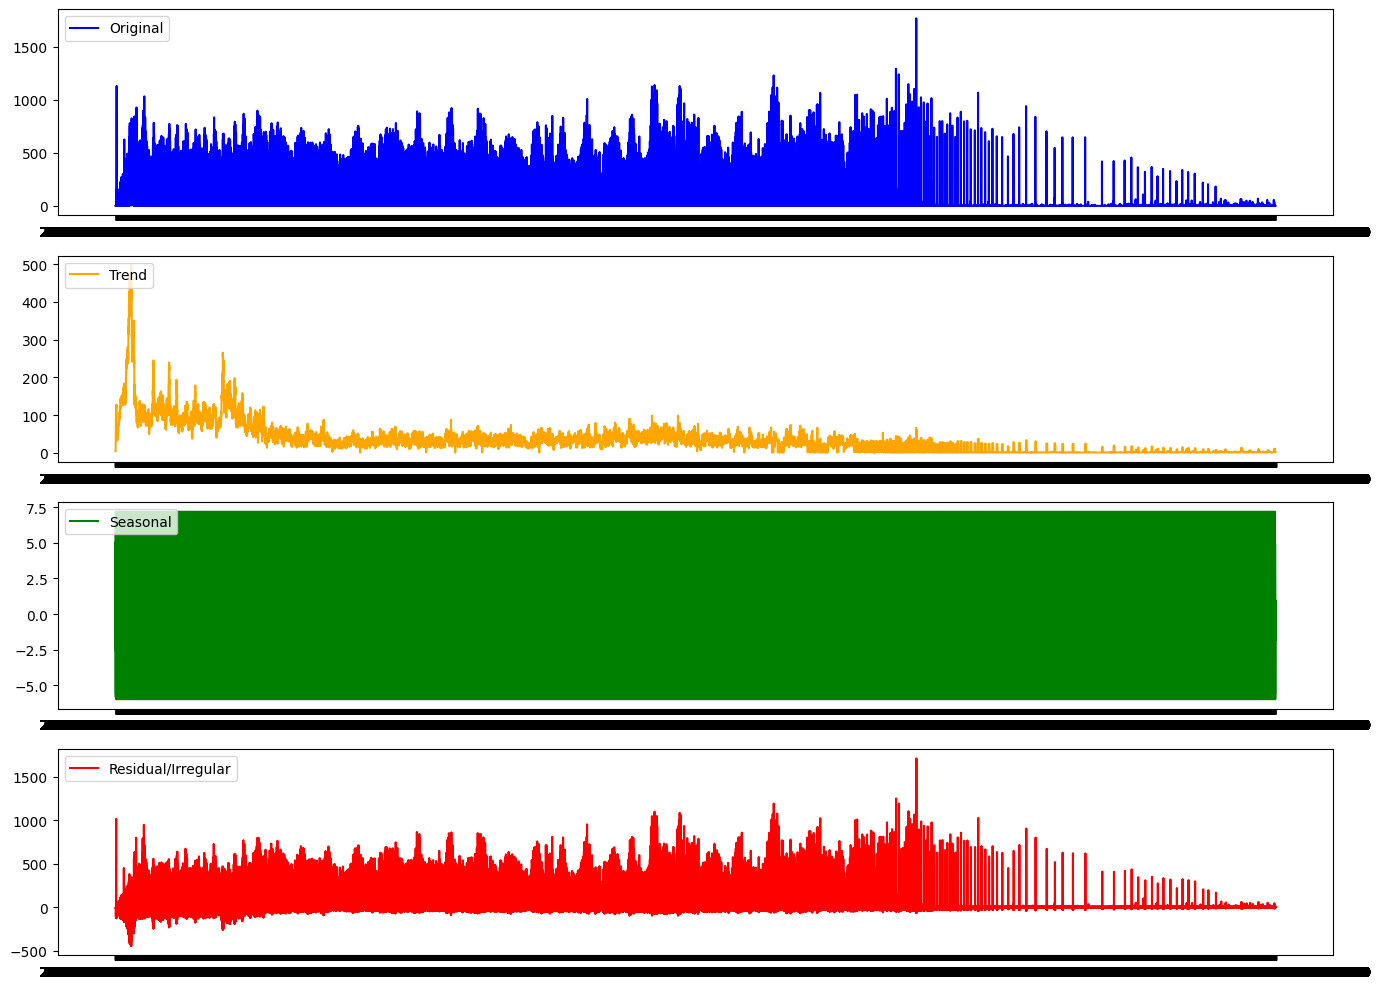

In [14]:
# platting the components
plt.figure(figsize=(14,10))


plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()